<img src="PalletSystem.png">

In [1]:
import os, sys

path_name = os.path.dirname(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(path_name)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from Engine.Data.IO import IO
from Engine.Pipeline.pipeline import NextoptBasePipeline,NextoptWeekdayDMPipeline,NextoptWeekdayDMProphetPipeline
from Engine.Data.IO import IO
from Engine.Data.transformer import Transformer
from Engine.Data.explorer import Explorer

# 1. Input
path_name = os.path.dirname(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(path_name)
print(path_name)

data_dir = path_name + '/Data/DB'

/Users/moonygo/Documents/NextoptEngine_light


<img src="PalletFlowDataType.png">

In [37]:
df_pallets = IO.read_pickle(data_dir + '/KPP일별_발주_유형별전처리.pkl') 
# 2. Transformer
df_pallets.head()
df_pallets.transformer.dt_format = '%Y%m%d' 

다음 파렛트 유형중에 선택 하여 df_pallets.transformer.get(code=['N11']) code에 넣는다

In [38]:
df_pallets.columns

Index(['AP11', 'AP12', 'AP95', 'BAG', 'C11', 'C95', 'D11', 'EL14', 'EL18',
       'GIT', 'GP12', 'GTW', 'H11', 'IN11', 'L12', 'L14', 'L14J', 'N11',
       'N11R', 'N11S', 'N11Y', 'N12', 'N15', 'NG11R', 'P05', 'P06', 'P10',
       'P11', 'P11R', 'P12', 'P13', 'P14', 'P15', 'P94', 'PA11', 'PA12',
       'PA95', 'PG11R', 'R12', 'R14', 'R14Y', 'S11', 'TOT', 'W08J', 'W11',
       'W12', 'W13', 'W14', 'WP11', 'WP12'],
      dtype='object')

In [39]:
df_N11 = df_pallets.transformer.get(code=['N11'], weekday=[0,1,2,3,4,5,6],start='2012-01-01', end='2017-12-31').fillna(0.0)

In [40]:
df_L14 = df_pallets.transformer.get(code=['L14'], weekday=[0,1,2,3,4,5,6],start='2012-01-01', end='2017-12-31').fillna(0.0)

In [41]:
df_P11 = df_pallets.transformer.get(code=['P11'], weekday=[0,1,2,3,4,5,6],start='2012-01-01', end='2017-12-31').fillna(0.0)

In [42]:
df_P13= df_pallets.transformer.get(code=['P13'], weekday=[0,1,2,3,4,5,6],start='2012-01-01', end='2017-12-31').fillna(0.0)

In [43]:
df_P14= df_pallets.transformer.get(code=['P14'], weekday=[0,1,2,3,4,5,6],start='2012-01-01', end='2017-12-31').fillna(0.0)

In [44]:
df_set=[df_N11,df_L14,df_P11,df_P13,df_P14]

In [70]:
df_N11.explorer.group_by_weekday

<bound method Explorer.group_by_weekday of <Engine.Data.explorer.Explorer object at 0x1c232bf630>>

In [ ]:
df_N11.explorer.group_by_weekday

In [56]:
import sklearn
from sklearn.cluster import KMeans
import numpy as np
def prepare_clustering(df_mean):
    a=[]
    for i in df_mean:
        i=[i]
        a.append(i)
    return a
def clustering(a):
    for i in range(1,8):
        kmeans=KMeans(n_clusters=i, random_state=1).fit(a)
        print(kmeans.labels_)

[0 0 0 0 0 0 0]
[1 1 1 1 1 0 0]
[1 1 1 1 1 0 2]
[3 1 1 1 1 0 2]
[3 1 1 4 1 0 2]
[3 1 5 4 5 0 2]
[3 1 5 4 6 0 2]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 1]
[2 2 2 2 2 0 1]
[2 2 2 2 3 0 1]
[4 2 4 2 3 0 1]
[4 2 4 5 3 0 1]
[6 2 4 5 3 0 1]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 1]
[0 0 0 0 2 0 1]
[0 0 3 3 2 0 1]
[4 0 3 3 2 0 1]
[4 5 3 3 2 0 1]
[4 5 3 6 2 0 1]
[0 0 0 0 0 0 0]
[0 0 0 0 0 1 1]
[1 1 1 1 1 0 2]
[3 1 1 1 1 0 2]
[3 1 4 1 1 0 2]
[3 1 4 5 5 0 2]
[3 1 4 6 5 0 2]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 1]
[2 0 2 0 0 2 1]
[0 2 3 2 2 0 1]
[4 2 3 2 2 0 1]
[4 2 3 5 2 0 1]
[4 6 3 5 2 0 1]


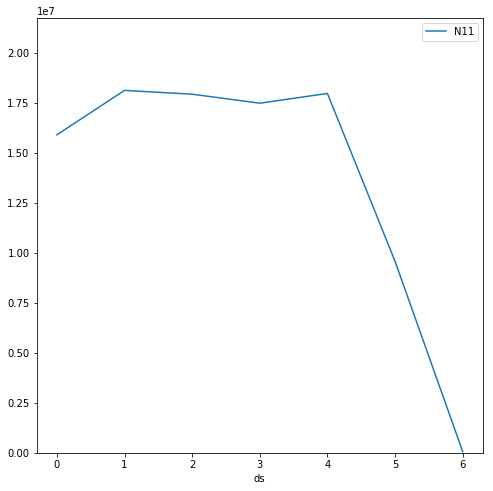

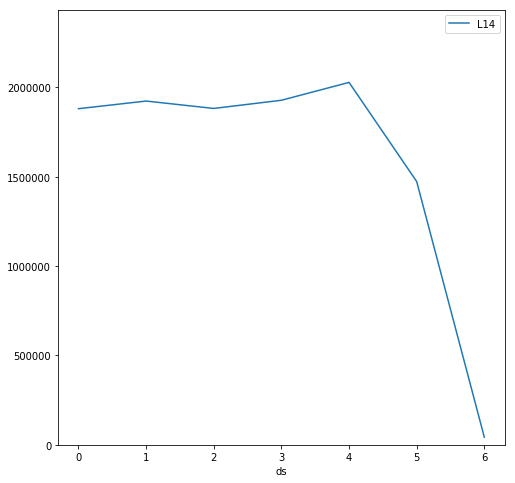

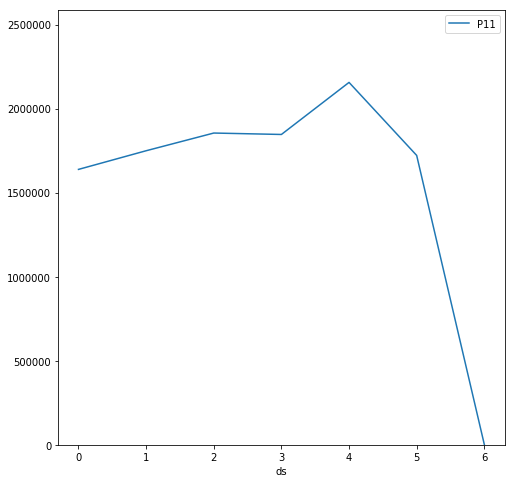

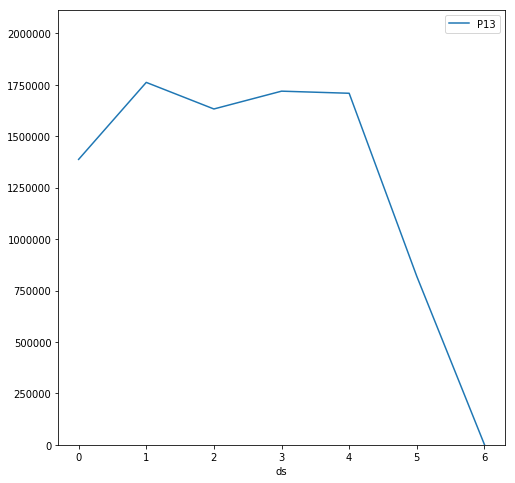

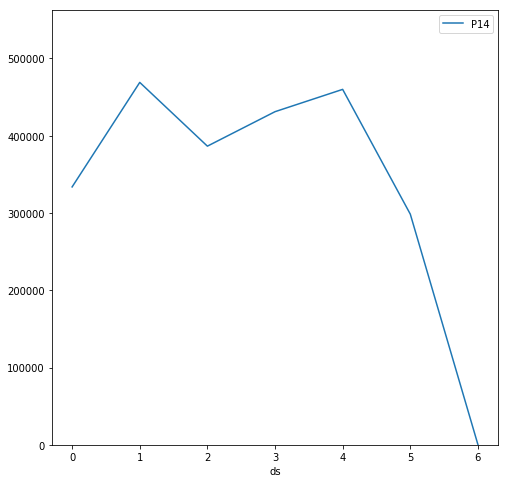

In [57]:
for df in df_set:
    df.explorer.plot_by_weekday()
    df_mean = df.explorer.stats_by_weekday()['mean']
    a=prepare_clustering(df_mean)
    clustering(a)
    print("===========")

In [ ]:
df = df_pallets.transformer.get(code=['N11'], weekday=[0,1,2,3,4,5,6])
df = df.fillna(0)
df = df.reset_index()
df.columns = ['ds','y']

pipeline = NextoptWeekdayDMProphetPipeline()
pipeline.raw_data = df
pipeline.horizon = 30 # 예측할 기간(defualt: 30)
pipeline.unit = 'd'

df_holiday_main = IO.read_pickle('../../Data/기타/holiday/1. 설날과추석.pkl')
df_holiday_sub = IO.read_pickle('../../Data/기타/holiday/2. 일반공휴일.pkl')
df_holiday_main['lower_window'] = 0
df_holiday_main['upper_window'] = 0
df_holiday_main['holiday'] = '중요휴일'

df_holiday_sub['lower_window'] = 0
df_holiday_sub['upper_window'] = 0
df_holiday_sub['holiday'] = '보통휴일'

df_holidays = pd.concat([df_holiday_main, df_holiday_sub])

pipeline.cross_validation_split(fold = 2)

#pipeline.division_condition = ['0','1','2','3','4','5','6'] # mon - thur, sat, sun
#pipeline.division_condition=['01234','5','6']
#pipeline.division_condition=['012345','6']
pipeline.division_condition = ['0','1','2','3','4','5','6'] 
pipeline.division_condition

pipeline.model = Prophet(
        daily_seasonality= False,
        weekly_seasonality= True,
        yearly_seasonality= True,
        holidays = df_holidays
)

pipeline.fit_and_predict()
pipeline.merge_forecast()
pipeline.print_summary()

In [ ]:
pipeline.plot_forecast()

### 해당 파렛트의 요일별 추이 확인 후 묶음 결정

In [63]:
# weekday 월요일 - 0 ...  일요일 - 6
df = df_pallets.transformer.get(code=['N11'], weekday=[0,1,2,3,4,5,6])
df = df.fillna(0)
df = df.reset_index()
df.columns = ['ds','y']

In [64]:
pipeline = NextoptWeekdayDMProphetPipeline()
pipeline.raw_data = df
pipeline.horizon = 30 # 예측할 기간(defualt: 30)
pipeline.unit = 'd'

SET INDEX AS DS(DateTimeIndex)


## 2. holiday: 설날과 추석 & 일반 공휴일

In [65]:
df_holiday_main = IO.read_pickle('../../Data/기타/holiday/1. 설날과추석.pkl')
df_holiday_sub = IO.read_pickle('../../Data/기타/holiday/2. 일반공휴일.pkl')

In [66]:
df_holiday_main['lower_window'] = 0
df_holiday_main['upper_window'] = 0
df_holiday_main['holiday'] = '중요휴일'

df_holiday_sub['lower_window'] = 0
df_holiday_sub['upper_window'] = 0
df_holiday_sub['holiday'] = '보통휴일'

df_holidays = pd.concat([df_holiday_main, df_holiday_sub])

## fold의 조건을 설정가능

In [67]:
pipeline.cross_validation_split(fold = 2)

pipeline.division_condition = ['0','1','2','3','4','5','6'] # mon - thur, sat, sun

#pipeline.division_condition=['01234','5','6']

#pipeline.division_condition=['012345','6']
#pipeline.division_condition
pipeline.division_condition = ['0','1','2','3','4','5','6'] 
pipeline.division_condition

CROSS VALIDATION SPLIT IS DONE.
DIVIDE TRAIN BY WEEKDAY
DIVIDE EACH FOLD BY WEEKDAY
DIVIDE TRAIN BY WEEKDAY
DIVIDE EACH FOLD BY WEEKDAY


{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6]}

In [68]:
pipeline.model = Prophet(
        daily_seasonality= False,
        weekly_seasonality= True,
        yearly_seasonality= True,
        holidays = df_holidays
)
pipeline.fit_and_predict()
pipeline.merge_forecast()

FOLD  1  DIVISION  1  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  1  DIVISION  2  RESET TRAIN, TEST INDEX FOR PROPHET MODEL


/anaconda3/envs/nextopt/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


FOLD  1  DIVISION  3  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  1  DIVISION  4  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  1  DIVISION  5  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  1  DIVISION  6  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  1  DIVISION  7  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  2  DIVISION  1  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  2  DIVISION  2  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  2  DIVISION  3  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  2  DIVISION  4  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  2  DIVISION  5  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  2  DIVISION  6  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  2  DIVISION  7  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  1  DIVISION  1  FIT AND FORECAST DONE
FOLD  1  DIVISION  2  FIT AND FORECAST DONE
FOLD  1  DIVISION  3  FIT AND FORECAST DONE
FOLD  1  DIVISION  4  FIT AND FORECAST DONE
FOLD  1  DIVISION  5  FIT AND FORECAST DONE
FOLD  1  DIV

In [69]:
pipeline.evaluate()

KeyError: 0

In [61]:
pipeline.print_summary()

AttributeError: 'NoneType' object has no attribute 'round'

In [62]:
pipeline.plot_forecast()

In [ ]:
#pipeline.division_condition = ['01234','5','6'] # mon - thur, sat, sun
pipeline.division_condition = ['0','1','2','3','4','5','6'] # mon - thur, sat, sun

#pipeline.division_condition=['01234','5','6']

#pipeline.division_condition=['012345','6']
pipeline.division_condition

In [ ]:
b

In [ ]:
#pipeline.postprocess(holiday_correction_dict={0: df_holiday_main,
#                                          0: df_holiday_sub
#                                         })
pipeline.evaluate()

In [ ]:
pipeline.print_summary()

In [ ]:
pipeline.plot_forecast()

기타 holiday관련 조정가능한 목록

### 다음은 여기서 변경할 수 없고, fit을 다 한 후 postprocess에서 해야

In [ ]:
#pipeline.postprocess(holiday_correction_dict={0: df_holiday_main,
#                                          0.5: df_holiday_sub,
#                                         })
#pipeline.evaluate()

## 3. Seasonality Mode 

additive를 할건지 multiplicative를 할건지 결정: 평균값이 증가함에 따라 분산도 함께 커지면, seasonality는 add/multiple 중 후자가 맞다 (holtswinter와도 관련)

## 4. Trend Change

Trend를 보고, 활용할 데이터의 가중치나 parameter를 다르게 설정하면 됨

## 회수쪽으로 데이터 변경

In [ ]:
df_pallets = IO.read_pickle(data_dir + '/KPP일별_From5_To2_유형별전처리.pkl') 
# 2. Transformer
df_pallets.head()
df_pallets.transformer.dt_format = '%Y%m%d' 

In [ ]:
import sklearn
from sklearn.cluster import KMeans
import numpy as np
#X=np.array([1,2,3,12,13,14])
X = np.array([[1, 2], [1, 4], [1, 0],
     [4, 2], [4, 4], [4, 0]])
kmeans=KMeans(n_clusters=2).fit(X)

In [ ]:
X = np.array([[1], [4], [3],
     [42], [44], [40]])
kmeans=KMeans(n_clusters=2).fit(X)
kmeans.labels_

In [ ]:
kmeans.labels_

데이터를 가져올 때 start= , end= parameter를 통해 어떤 기간의 데이터를 가져올건지 결정가능(참고: trend chang와 관련있음)

## 1. 요일묶음